In [63]:
import numpy as np
import os
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from PIL import Image
import cv2
from sklearn.utils import shuffle
import re
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
# from keras.layers import Conv2D,
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, SGD

In [2]:
image_path="./car image logo/images/images/"
imgs=os.listdir(image_path)
img_x=img_y=50
n_samples=np.size(imgs)
n_samples

20778

In [3]:
len(imgs)

20778

In [4]:
images = np.array([ np.array( Image.open(image_path+img).convert("RGB") ).flatten() for img in imgs], order='F', dtype='uint8')

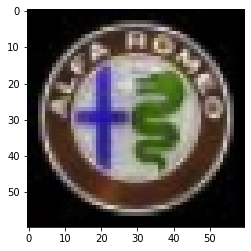

In [5]:
for im in os.scandir(image_path):
    if ".jpg" in im.path:
        cv=cv2.imread(im.path)
        resize_img=cv2.resize(cv,(60,60))
        img_array=np.array(resize_img)
        plt.imshow(img_array)
        plt.show()
        break

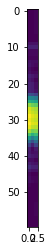

In [6]:
plt.imshow(img_array[3])
plt.show()

In [7]:
print("total-shape",np.shape(images))

total-shape (20778, 7500)


In [8]:
images.shape,img_array.shape

((20778, 7500), (60, 60, 3))

In [9]:
cars = ['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada',
        'Lancia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi',
        'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat',
        'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']

labels = np.array([ cars.index(re.match(r"(^\D+)", imgs[i])[0]) for i in range(n_samples)])
print('total label images: ', labels.shape )

total label images:  (20778,)


In [10]:
labels_pd = pd.DataFrame(labels)
labels_pd[0].value_counts()

0     852
1     744
22    698
10    667
3     663
18    656
8     645
38    644
28    632
37    615
19    612
26    605
2     602
25    593
23    585
27    584
20    561
36    559
32    551
24    538
33    501
14    500
9     493
15    490
12    488
21    484
34    467
17    460
11    456
4     438
30    431
39    406
13    404
31    374
5     363
16    354
6     318
7     316
35    303
29    126
Name: 0, dtype: int64

In [28]:
ls=[]
for i,lab in enumerate(os.listdir(image_path)):
    ls.append(lab.split('.')[0].lstrip().split(' ')[0])
ls
    


['Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 

In [29]:
my_label=[]
for j in ls:
    pattern=r'[0-9_]+small'
    my_string=re.sub(pattern,"",j)
    my_label.append(my_string)
len(my_label)

20778

In [30]:
my_label

['Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 'Alfa',
 

In [35]:
label_data=pd.DataFrame(my_label,columns=["Brand_name"])

In [36]:
class_mapping={label:idx for idx,label in enumerate(np.unique(label_data["Brand_name"]))}
label_data["Brand_name"]=label_data["Brand_name"].map(class_mapping)

In [40]:
lab=label_data


In [41]:
lab2=to_categorical(lab,num_classes=40)

In [13]:
# my_label=np.array(my_label)

In [42]:
lab2

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
images.shape,my_label.shape,labels.shape,img_array.shape

((20778, 7500), (20778,), (20778,), (60, 60, 3))

In [43]:
datasets,labelset=shuffle(images,lab2,random_state=42)
X,Y=datasets,labelset

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

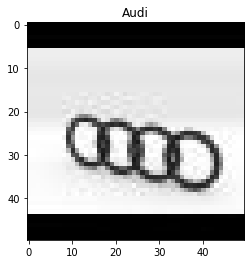

In [16]:
r=1260
plt.imshow(images[r].reshape(img_x, img_y, 3))
plt.title(my_label[r])
plt.show()

In [45]:
# y=to_categorical(Y,num_classes=40)

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [47]:
def ImageConvert(n, i):
    im_ex = i.reshape(n, img_x, img_y, 3)
    im_ex = im_ex.astype('float32') / 255
    # zero center data
    im_ex = np.subtract(im_ex, 0.5)
    # ...and to scale it to (-1, 1)
    im_ex = np.multiply(im_ex, 2.0)
    return im_ex
X_train = ImageConvert(X_train.shape[0], X_train)
X_test = ImageConvert(X_test.shape[0], X_test)

In [48]:
# Y_train = to_categorical(Y_train, num_classes=40)
# Y_test = to_categorical(Y_test, num_classes=40)

In [50]:
X.shape,Y.shape

((20778, 7500), (20778, 40))

In [53]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((16622, 50, 50, 3), (4156, 50, 50, 3), (16622, 40), (4156, 40))

In [64]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(img_x,img_y,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
model.add(Dense(40,activation="softmax"))
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

In [59]:
image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    vertical_flip=True)

#training the image preprocessing
image_gen.fit(X_train, augment=True)

In [60]:
image_gen

In [68]:
NUM_EPOCHS = 10
BATCH_SIZE = 128


# monitor the validation accuracy, reduce the learning rate by factor when there is no improvement after the number of patience 
# reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', 
#                               factor=0.3, 
#                               patience=3, 
#                               min_lr=0.0001)

# callbacks_list = [reduce_lr, early_stopping, take_best_model]

history = model.fit_generator(image_gen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              steps_per_epoch=X_train.shape[0]//BATCH_SIZE,
                              epochs=NUM_EPOCHS,
                              verbose=1,
                              validation_data=(X_test, Y_test),)
#                               callbacks=callbacks_list)

Epoch 1/10
129/129 [==============================] - 35s 274ms/step - loss: 3.1657 - categorical_accuracy: 0.1798 - val_loss: 3.0119 - val_categorical_accuracy: 0.2344
Epoch 2/10
129/129 [==============================] - 44s 341ms/step - loss: 3.0561 - categorical_accuracy: 0.2116 - val_loss: 2.8812 - val_categorical_accuracy: 0.2620
Epoch 3/10
129/129 [==============================] - 44s 340ms/step - loss: 2.9485 - categorical_accuracy: 0.2357 - val_loss: 2.8183 - val_categorical_accuracy: 0.2897
Epoch 4/10
129/129 [==============================] - 41s 320ms/step - loss: 2.8512 - categorical_accuracy: 0.2652 - val_loss: 2.7357 - val_categorical_accuracy: 0.3229
Epoch 5/10
129/129 [==============================] - 41s 316ms/step - loss: 2.7620 - categorical_accuracy: 0.2846 - val_loss: 2.6665 - val_categorical_accuracy: 0.3306
Epoch 6/10
129/129 [==============================] - 49s 382ms/step - loss: 2.6917 - categorical_accuracy: 0.3056 - val_loss: 2.5642 - val_categorical_acc

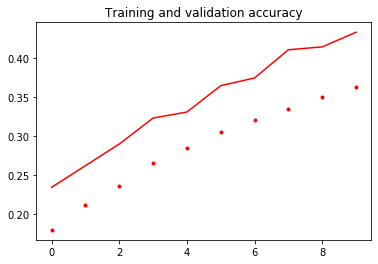

4156/4156 [==============================] - 3s 652us/step
Accuracy test: 43.26%


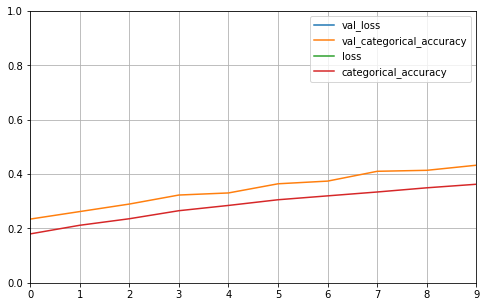

In [69]:
def plot_training(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()
    
plot_training(history)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

#print("Saved model to disk")
scores = model.evaluate(X_test, Y_test) # let's look at the accuracy on the test set
print("Accuracy test: %.2f%%" % (scores[1]*100))